In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , classification_report

%matplotlib inline

**Load the data**

In [2]:
df = pd.read_csv("..\Data\customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2020,2546-KZAAT,Male,0,Yes,No,52,Yes,No,DSL,Yes,...,No,No,Yes,Yes,One year,Yes,Mailed check,75.4,3865.45,No
6254,9933-QRGTX,Female,0,Yes,No,60,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,97.2,5611.75,No
2514,8922-LIEGH,Female,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.7,2187.55,Yes
4312,1431-AIDJQ,Male,0,Yes,Yes,33,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),82.1,2603.1,No
3616,8707-RMEZH,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,One year,No,Credit card (automatic),87.3,6055.55,No


**First of all, drop customerID column as it is of no use and remove the with space in TotalCharges** 

In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [5]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\abhui\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [7]:
df2 = df1[['tenure','Contract','TotalCharges','Churn']]
df2

,tenure,Contract,TotalCharges,Churn
0,1,Month-to-month,29.85,No
1,34,One year,1889.50,No
2,2,Month-to-month,108.15,Yes
3,45,One year,1840.75,No
4,2,Month-to-month,151.65,Yes
...,...,...,...,...
7038,24,One year,1990.50,No
7039,72,One year,7362.90,No
7040,11,Month-to-month,346.45,No
7041,4,Month-to-month,306.60,Yes


In [8]:
df2['Churn'].replace({'Yes':1,'No':0},inplace=True)

C:\Users\abhui\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\series.py:4506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [9]:
df3 = pd.get_dummies(data=df2, columns=['Contract'])
df3.columns

Index(['tenure', 'TotalCharges', 'Churn', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [10]:
df3.sample(5)

,tenure,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
534,1,85.00,1,1,0,0
5952,4,84.20,0,1,0,0
478,5,453.40,1,1,0,0
2272,1,49.85,0,1,0,0
4295,67,4119.40,0,0,1,0


In [11]:
cols_to_scale = ['tenure','TotalCharges']
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [12]:
df3.dtypes

tenure                     float64
TotalCharges               float64
Churn                        int64
Contract_Month-to-month      uint8
Contract_One year            uint8
Contract_Two year            uint8
dtype: object

In [13]:
X = df3.drop('Churn',axis='columns')
y = df3['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(5,), activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 5ms/step - loss: 0.5761 - accuracy: 0.7445
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4768 - accuracy: 0.7446
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4685 - accuracy: 0.7420
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4657 - accuracy: 0.7387
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4709 - accuracy: 0.7435
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4635 - accuracy: 0.7547
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4638 - accuracy: 0.7472
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4538 - accuracy: 0.7583
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4642 - accuracy: 0.7501
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4568 - accura

176/176 [==============================] - 1s 5ms/step - loss: 0.4289 - accuracy: 0.7892
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4249 - accuracy: 0.7910
Epoch 83/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4235 - accuracy: 0.7872
Epoch 84/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4220 - accuracy: 0.7966
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4208 - accuracy: 0.7939
Epoch 86/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4316 - accuracy: 0.7877
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4326 - accuracy: 0.7910
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4394 - accuracy: 0.7814
Epoch 89/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4274 - accuracy: 0.7900
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4274 - accuracy: 

In [16]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.7811


[0.446153849363327, 0.7810945510864258]

In [17]:
yp = model.predict(X_test)
yp[:5]

array([[0.2616989 ],
       [0.2718879 ],
       [0.04108272],
       [0.62960345],
       [0.21793796]], dtype=float32)

In [18]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [19]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [20]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [21]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       999
           1       0.71      0.41      0.52       408

    accuracy                           0.78      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.77      0.78      0.76      1407



Text(69.0, 0.5, 'Truth')

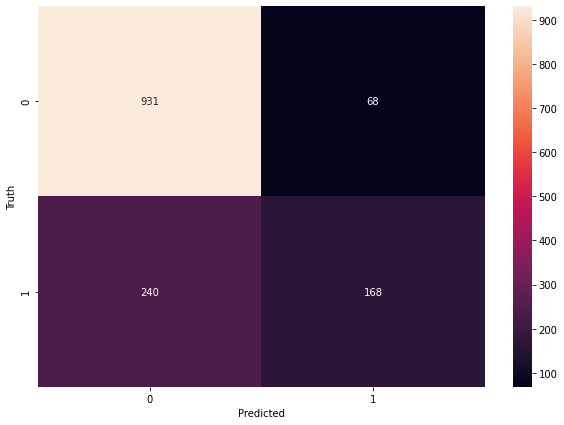

In [22]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')